In [1]:
import pandas as pd

df = pd.read_excel('./data/Sales.xlsx', sheet_name='Sheet1')

In [2]:
# Quantidade de colunas e registros
df.shape

(2000, 10)

In [3]:
#Colunas
df.columns.values

array(['Date', 'Region', 'Product', 'Salesperson', 'Units_Sold',
       'Unit_Price', 'Category', 'Revenue', 'Cost', 'Profit'],
      dtype=object)

In [4]:
# Head
df.head()

,Date,Region,Product,Salesperson,Units_Sold,Unit_Price,Category,Revenue,Cost,Profit
0,2024-04-12,North,Smartwatch,Hannah,15.0,1224.0,Accessories,18360.0,16451.634258,1908.365742
1,2024-12-14,North,Monitor,Eva,5.0,1321.0,Office,6605.0,4457.351727,2147.648273
2,2024-09-27,North,Mobile,Bob,11.0,912.0,Electronics,10032.0,6563.644126,3468.355874
3,2024-04-16,West,Monitor,Charlie,18.0,325.0,Office,5850.0,4320.807092,1529.192908
4,2024-03-12,West,Headphones,Eva,13.0,1042.0,Accessories,13546.0,8270.122666,5275.877334


In [17]:
# Column types
print(df.info())

# Missing values by column
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         2000 non-null   datetime64[ns]
 1   Region       1961 non-null   object        
 2   Product      1960 non-null   object        
 3   Salesperson  1960 non-null   object        
 4   Units_Sold   1960 non-null   float64       
 5   Unit_Price   1960 non-null   float64       
 6   Category     2000 non-null   object        
 7   Revenue      1921 non-null   float64       
 8   Cost         1921 non-null   float64       
 9   Profit       1921 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 156.4+ KB
None
Date            0
Region         39
Product        40
Salesperson    40
Units_Sold     40
Unit_Price     40
Category        0
Revenue        79
Cost           79
Profit         79
dtype: int64


In [53]:
print(df.describe())   # For numeric columns
print(df["Category"].value_counts())  # Frequency by category

                             Date   Units_Sold   Unit_Price       Revenue  \
count                        2000  2000.000000  2000.000000   1921.000000   
mean   2024-07-01 16:25:40.800000     9.887500  1040.876500  10785.823529   
min           2024-01-01 00:00:00    -5.000000  -100.000000  -8975.000000   
25%           2024-04-04 00:00:00     5.000000   553.750000   3597.000000   
50%           2024-07-01 00:00:00    10.000000  1048.000000   8268.000000   
75%           2024-10-03 00:00:00    15.000000  1507.500000  16461.000000   
max           2024-12-31 00:00:00    19.000000  1997.000000  37715.000000   
std                           NaN     5.722431   560.054177   8722.447605   

               Cost        Profit  
count   1921.000000   1921.000000  
mean    8065.726146   2720.097383  
min    -7905.695724  -1069.304276  
25%     2665.613741    784.467841  
50%     6014.593046   1928.596208  
75%    12152.488896   3936.337721  
max    31723.724915  14409.770718  
std     6645.82710

In [52]:
df['Units_Sold'] = df['Units_Sold'].fillna(0)
df['Unit_Price'] = df['Unit_Price'].fillna(0)

In [20]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Units')

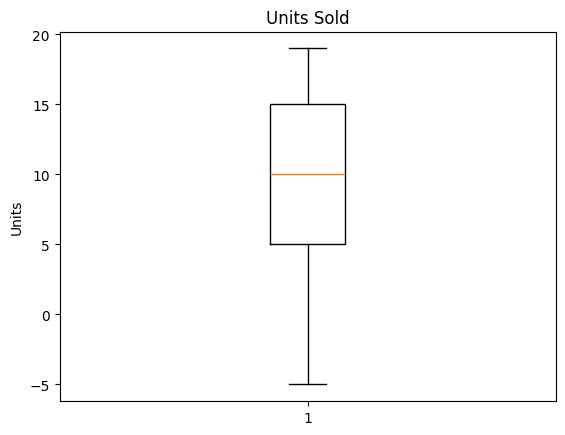

In [54]:
# Outliers Units_Sold

plt.boxplot(df["Units_Sold"].dropna())
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.title('Units Sold')
plt.ylabel("Units")

Text(0, 0.5, 'Price')

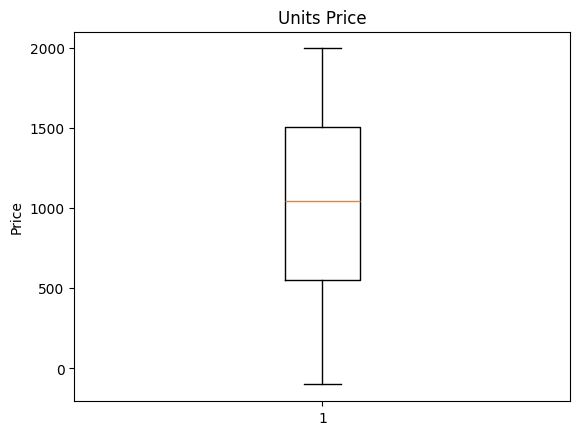

In [55]:
# Outliers Unit_Price

plt.boxplot(df['Unit_Price'].dropna())
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.title('Units Price')
plt.ylabel("Price")

In [63]:
# df.loc[df['Units_Sold'] == 0]

df.loc[(df['Product'] == 'Tablet') & (df['Salesperson'] == 'Hannah') & (df['Region'] == 'South')]

,Date,Region,Product,Salesperson,Units_Sold,Unit_Price,Category,Revenue,Cost,Profit
34,2024-07-08,South,Tablet,Hannah,0.0,387.0,Electronics,NaN,NaN,NaN
181,2024-07-16,South,Tablet,Hannah,13.0,1993.0,Electronics,25909.0,16304.490252,9604.509748
302,2024-10-30,South,Tablet,Hannah,3.0,383.0,Electronics,1149.0,1008.758035,140.241965
459,2024-03-09,South,Tablet,Hannah,6.0,1115.0,Electronics,6690.0,4300.285379,2389.714621
920,2024-01-25,South,Tablet,Hannah,9.0,850.0,Electronics,7650.0,5737.303520,1912.696480
925,2024-05-25,South,Tablet,Hannah,11.0,1094.0,Electronics,12034.0,8252.332870,3781.667130
1034,2024-11-15,South,Tablet,Hannah,10.0,693.0,Electronics,6930.0,4441.922641,2488.077359
1060,2024-10-14,South,Tablet,Hannah,10.0,1447.0,Electronics,14470.0,11829.822600,2640.177400
1085,2024-02-07,South,Tablet,Hannah,13.0,805.0,Electronics,10465.0,8327.521805,2137.478195
1293,2024-10-29,South,Tablet,Hannah,10.0,416.0,Electronics,4160.0,2624.312354,1535.687646
